In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf


## Question 1 & 2

In [10]:
df_2_1 = pd.read_csv('homework_2.1.csv')

In [11]:
# Reshape to long format
df_long = df_2_1.melt(id_vars=['time'], value_vars=['G1', 'G2', 'G3'], 
                 var_name='group', value_name='outcome')

# Fit fixed effects regression: outcome ~ time + group
model_2_1 = smf.ols('outcome ~ time + C(group)', data=df_long).fit()
print(model_2_1.summary())

# Display estimated fixed effects for each group
fe = model_2_1.params.filter(like='C(group)')
print('\nFixed effects for each group:')
print(fe)

# Display the coefficient for time
print(f"\nCoefficient for time: {model_2_1.params['time']}")

                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     44.55
Date:                Mon, 26 May 2025   Prob (F-statistic):           8.72e-24
Time:                        17:33:43   Log-Likelihood:                -216.89
No. Observations:                 300   AIC:                             441.8
Df Residuals:                     296   BIC:                             456.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0786      0.071      1.

## Question 3-5

In [5]:
df_2_2 = pd.read_csv('homework_2.2.csv')

Bootstrap mean difference: 2.924
95% CI: [2.569, 3.285]


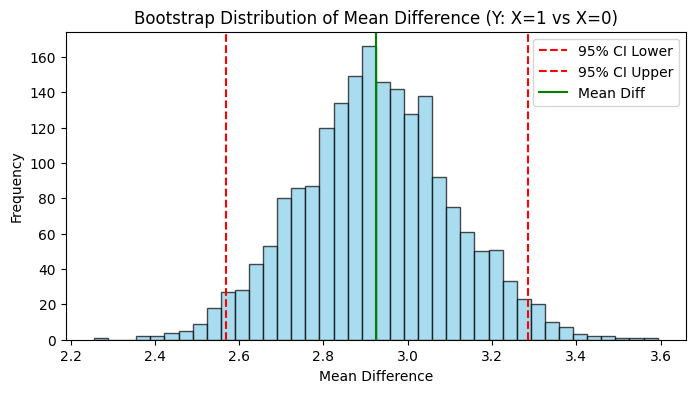

In [6]:
# Bootstrap simulation for mean difference in Y between X=1 and X=0
def bootstrap_mean_diff(df, n_bootstrap=1000, random_state=42):
    np.random.seed(random_state)
    diffs = []
    group1 = df[df['X'] == 1]['Y'].values
    group0 = df[df['X'] == 0]['Y'].values
    n1 = len(group1)
    n0 = len(group0)
    for _ in range(n_bootstrap):
        sample1 = np.random.choice(group1, size=n1, replace=True)
        sample0 = np.random.choice(group0, size=n0, replace=True)
        diffs.append(sample1.mean() - sample0.mean())
    return np.array(diffs)

# Run bootstrap
boot_diffs = bootstrap_mean_diff(df_2_2, n_bootstrap=2000)

# Calculate 95% confidence interval
ci_lower = np.percentile(boot_diffs, 2.5)
ci_upper = np.percentile(boot_diffs, 97.5)
mean_diff = boot_diffs.mean()

print(f"Bootstrap mean difference: {mean_diff:.3f}")
print(f"95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]")

# Plot the bootstrap distribution
plt.figure(figsize=(8,4))
plt.hist(boot_diffs, bins=40, color='skyblue', edgecolor='k', alpha=0.7)
plt.axvline(ci_lower, color='red', linestyle='--', label='95% CI Lower')
plt.axvline(ci_upper, color='red', linestyle='--', label='95% CI Upper')
plt.axvline(mean_diff, color='green', linestyle='-', label='Mean Diff')
plt.title('Bootstrap Distribution of Mean Difference (Y: X=1 vs X=0)')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [7]:
mean_treated = df_2_2[df_2_2['X'] == 1]['Y'].mean()
mean_untreated = df_2_2[df_2_2['X'] == 0]['Y'].mean()
simple_diff = mean_treated - mean_untreated

print(f"Mean outcome (Treated, X=1): {mean_treated:.3f}")
print(f"Mean outcome (Untreated, X=0): {mean_untreated:.3f}")
print(f"Simple difference in means (Treated - Untreated): {simple_diff:.3f}")

Mean outcome (Treated, X=1): 7.843
Mean outcome (Untreated, X=0): 4.922
Simple difference in means (Treated - Untreated): 2.921
